<a href="https://colab.research.google.com/github/AIhexNICK-MAIL-RU/big_data/blob/main/Boston_house_prising_hw_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.set(style="whitegrid", font_scale=1.3)
matplotlib.rcParams["legend.framealpha"] = 1
matplotlib.rcParams["legend.frameon"] = True

In [ ]:
np.random.seed(42)
torch.manual_seed(42);

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [ ]:
y = df['index']
X = df[['0.00632', '18.00', '2.310', '0', '0.5380', '6.5750', '65.20', '4.0900', '1', '296.0', '15.30', '396.90', '4.98', '24.00']]

KeyError: ignored

In [ ]:
y[:3]

NameError: ignored

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored

NameError: ignored

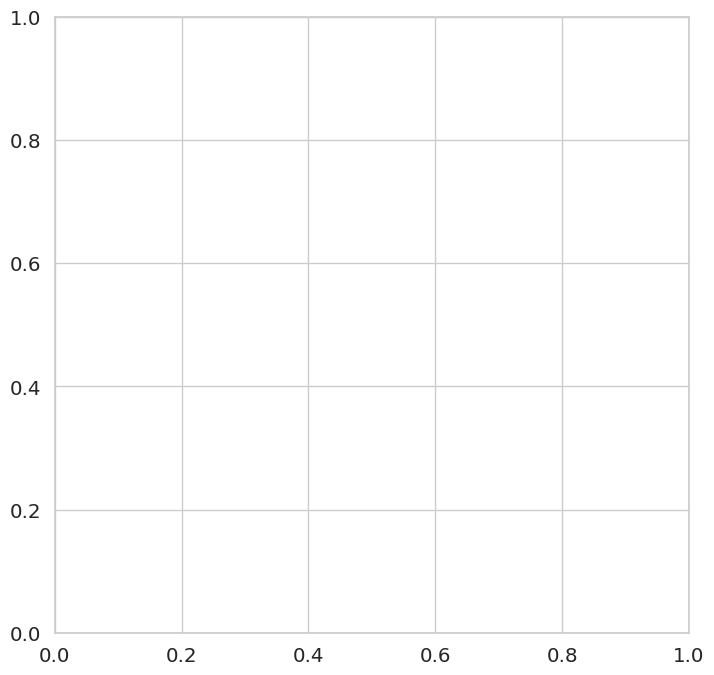

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(121)
plt.scatter(X_train.rm, y_train, label="Train")
plt.scatter(X_val.rm, y_val, c="r", label="Validation")
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Price, $")
plt.legend(loc="lower right", frameon=True)
plt.subplot(122)
plt.scatter(X_train.rad, y_train, label="Train")
plt.scatter(X_val.rad, y_val, c="r", label="Validation")
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Price, $")
plt.legend(loc="lower right");

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

NameError: ignored

In [ ]:
X_val_scaled = scaler.transform(X_val)

NameError: ignored

In [ ]:
X_train_tensor = torch.tensor(np.array(X_train_scaled), dtype=torch.float)
X_val_tensor = torch.tensor(np.array(X_val_scaled), dtype=torch.float)

y_train_tensor = torch.tensor(y_train[:, None], dtype=torch.float)
y_val_tensor = torch.tensor(y_val[:, None], dtype=torch.float)

NameError: ignored

In [ ]:
n_data, n_features = X_train_tensor.shape

NameError: ignored

In [ ]:
n_data

NameError: ignored

In [ ]:
n_features

NameError: ignored

In [ ]:
loss_func = F.mse_loss

In [ ]:
metrics_func = [loss_func]
metrics_name = ["MSE"]

In [ ]:
def evaluate(model, metrics_func, X, y):
    metrics_value = []
    with torch.no_grad():
        preds = model(X)
        for metric_func in metrics_func:
            metric_value = metric_func(torch.FloatTensor(preds).flatten(), torch.FloatTensor(y).flatten())
            metrics_value.append(metric_value)
    return metrics_value

In [ ]:
def print_metrics(models, metrics_func, train_data, val_data, metrics_name, models_name):
    results = np.zeros((2 * len(models), len(metrics_func)))
    data_name = []
    for m in models_name:
        data_name.extend([m + " Train", m + " Validation"])
    for m_num, model in enumerate(models):
        for row, sample in enumerate([train_data, val_data]):
            results[row + m_num * 2] = evaluate(model, metrics_func, sample[0], sample[1])
    results = pd.DataFrame(results, columns=metrics_name, index=data_name)
    return results

In [ ]:
def draw_predictions(y_true, y_pred, model_name=None):
    if model_name is None:
        model_name = "Model"
    plt.figure(figsize=(10, 10))
    ax = plt.gca()
    ax.set_aspect("equal")
    plt.xlim([5, 50])
    plt.ylim([5, 50])
    sns.regplot(x=y_true, y=y_pred, robust=True,
                label=model_name,
                scatter_kws={"zorder": 10}, line_kws={"zorder": 15})
    ax.set_xlabel("Ground truth")
    ax.set_ylabel("Predictions")

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, "r--", alpha=0.75, zorder=5, label="Perfect")
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    plt.legend()

In [ ]:
%%time

model_lr_sklearn = LinearRegression()
model_lr_sklearn.fit(X_train_scaled, y_train)

NameError: ignored

In [ ]:
print_metrics(models=[model_lr_sklearn.predict],
              metrics_func=metrics_func,
              train_data=(X_train_tensor, y_train_tensor),
              val_data=(X_val_tensor, y_val_tensor),
              metrics_name=["MSE"],
              models_name=["Sk LR"])

NameError: ignored

In [ ]:
model_lr = nn.Sequential(
    nn.Linear(in_features=n_features, out_features=1),
)

NameError: ignored

In [ ]:
opt_lr = optim.SGD(params=model_lr.parameters(), lr=0.001)
batch_size_lr = 16

NameError: ignored

In [ ]:
%%time

epochs_lr = 1000
history_lr_train = []
history_lr_val = []

for epoch in tqdm(range(epochs_lr)):
    for i in range((n_data - 1) // batch_size_lr + 1):

        start_i = i * batch_size_lr
        end_i = start_i + batch_size_lr
        Xb = X_train_tensor[start_i:end_i]
        yb = y_train_tensor[start_i:end_i]

        pred = model_lr(Xb)

        loss = loss_func(pred, yb)

        loss.backward()

        opt_lr.step()
        opt_lr.zero_grad()

    history_lr_train.append(evaluate(model_lr, metrics_func, X_train_tensor, y_train_tensor))
    history_lr_val.append(evaluate(model_lr, metrics_func, X_val_tensor, y_val_tensor))

history_lr_train = np.array(history_lr_train)
history_lr_val = np.array(history_lr_val)

  0%|          | 0/1000 [00:00<?, ?it/s]

NameError: ignored

In [ ]:
print_metrics(models=[model_lr_sklearn.predict, model_lr],
              metrics_func=metrics_func,
              train_data=(X_train_tensor, y_train_tensor),
              val_data=(X_val_tensor, y_val_tensor),
              metrics_name=["MSE"],
              models_name=["Sk LR", "LR"])

NameError: ignored

In [ ]:
X_val.tail(1)

NameError: ignored

In [ ]:
y_val.tail(1)

NameError: ignored

In [ ]:
with torch.no_grad():
    print(model_lr(X_val_tensor[-1:]))

NameError: ignored

In [ ]:
with torch.no_grad():
    draw_predictions(
        y_true=y_val,
        y_pred=np.array(model_lr(X_val_tensor)).flatten(),
        model_name="PyTorch LR",
    )

NameError: ignored